In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# Step 1: Collect and prepare the data

In [2]:
import pandas as pd

titanic_data = pd.read_csv("Titanic-Dataset.csv")


In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


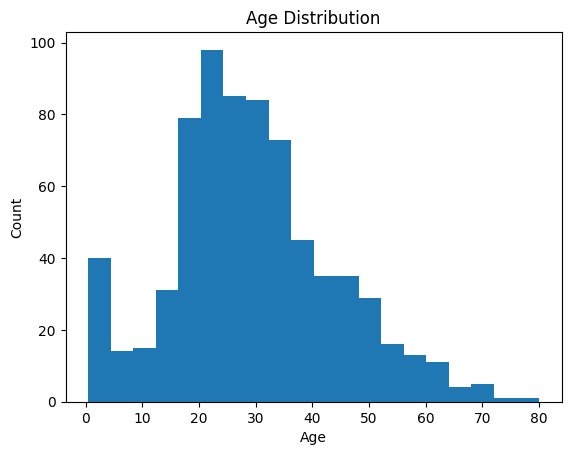

In [5]:
# Performing exploratory data analysis (EDA)
# Example: Histogram of age
import matplotlib.pyplot as plt

plt.hist(titanic_data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

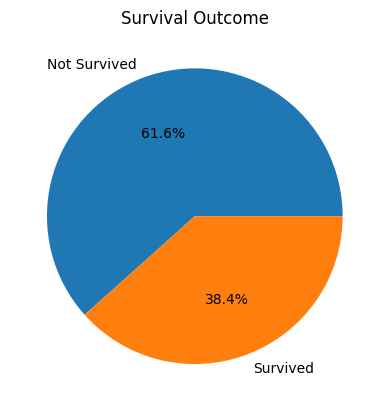

In [6]:
# Count the number of survivors and non-survivors
survival_counts = titanic_data['Survived'].value_counts()

# Create a pie chart
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Outcome')
plt.show()

# Step 2: Explore and preprocess the data

In [7]:
# Drop irrelevant columns
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables into numerical representations
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])

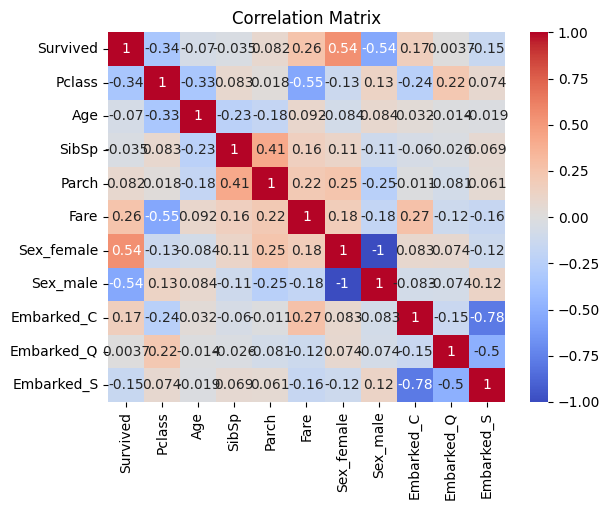

In [8]:
# Visualize relationships between variables
# Example: Heatmap of correlation matrix

import seaborn as sns 
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 3: Selecting a classifier algorithm

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model = RandomForestClassifier()

# Step 4: Train the model

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Evaluate the model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the RandomForestClassifier model
model = RandomForestClassifier()

# Fit the model with training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7988826815642458


# Step 6: Feature importance analysis

In [12]:
importances = model.feature_importances_
feature_names = X.columns

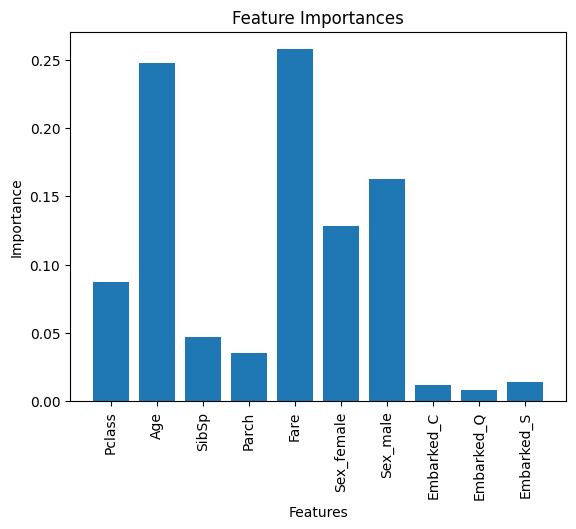

In [13]:
# Visualize feature importances
plt.bar(feature_names, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

# Step 7: Optimize the model (e.g., hyperparameter tuning)

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


# Step 8: Predict survival outcomes

In [15]:
test_data = pd.read_csv("Titanic-Dataset.csv")

# Preprocess the test data
test_data = test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])



In [16]:
# Make predictions on the test data
X_test_data = test_data.drop('Survived', axis=1)
y_pred_test = model.predict(X_test_data)

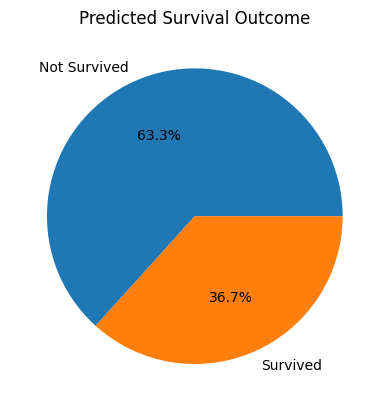

NameError: name 'confusion_matrix' is not defined

In [18]:
# Visualize the predicted survival outcomes
survival_counts = pd.Series(y_pred_test).value_counts()

plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Predicted Survival Outcome')
plt.show()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [19]:
import pandas as pd

# Create a new test dataset with individual data including status
individual_data = pd.DataFrame({
    'Age': [25, 35, 40],  # Age of the individuals
    'Sex': ['female', 'male', 'female'],  # Gender of the individuals
    'Fare': [50, 20, 100],  # Fare paid by the individuals
    'Pclass': [1, 3, 2],  # Passenger class of the individuals
    'Embarked': ['C', 'S', 'Q'],  # Port of Embarkation of the individuals
    'Status': ['Crew', 'Passenger', 'Passenger'],  # Status of the individuals
    'Parch': [0, 0, 0],  # Number of parents/children aboard
    'SibSp': [1, 0, 1]  # Number of siblings/spouses aboard
    # Include other relevant features
})

# Preprocess the data for the new test dataset
individual_data = pd.get_dummies(individual_data, columns=['Sex', 'Embarked', 'Status'])
individual_data = individual_data.reindex(columns=X.columns, fill_value=0)

# Make predictions for the new test dataset
predictions = model.predict(individual_data)

# Display the predictions for each individual
for i, prediction in enumerate(predictions):
    individual = individual_data.iloc[i]
    if prediction == 1:
        print(f"Individual {i+1}: The person is predicted to have survived.")
    else:
        print(f"Individual {i+1}: The person is predicted to have not survived.")


Individual 1: The person is predicted to have survived.
Individual 2: The person is predicted to have not survived.
Individual 3: The person is predicted to have survived.


In [20]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import plotly.express as px

# Get the feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Create a bar plot using Plotly
fig = px.bar(
    importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    color='Importance',
    labels={'Importance': 'Feature Importance'},
    title='Feature Importances'
)

fig.update_layout(
    title={'x': 0.5},
    yaxis={'title': 'Feature'},
    xaxis={'title': 'Importance'},
    coloraxis_colorbar=dict(
        title='Importance',
        tickvals=[0, max(importances)],
        ticktext=['Low', 'High']
    ),
    template='plotly_white'
)

fig.show()
